In [2]:
# settings
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Detailed Listings data for New York City:

In [8]:
# import listings
listings = pd.read_csv("listings.csv")

In [27]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,We will have a list of Harlem restaurants and ...,no-smoking/please take off your shoes: cleanin...,NaN,NaN,https://a0.muscache.com/im/pictures/d0489e42-4...,NaN,2758,https://www.airbnb.com/users/show/2758,Steph,2008-09-06,"New York, New York, United States",loves to host and welcome travelers from arou...,within a few hours,70%,NaN,t,https://a0.muscache.com/im/users/2758/profile_...,https://a0.muscache.com/im/users/2758/profile_...,Harlem,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10026,New York,"New York, NY",US,United States,40.799205,-73.953676,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$59.00,$720.00,"$1,690.00",$0.00,$60.00,2,$39.00,2,21,today,t,3,12,23,298,2018-12-06,175,2008-10-13,2018-11-18,93.0,9.0,9.0,10.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",NaN,"Yes! B, C, and 1 trains are within 5 minute w...",Guests have access to the whole apartment: wi...,I interact with guests upon arrival & departur...,"Sorry, no pets and no smoking, please. No pa...",NaN,NaN,https://a0.muscache.com/im/pictures/111808/a94...,NaN,42032,https://www.airbnb.com/users/show/42032,Dana,2009-09-29,"New York, New York, United States","I'm an arts consultant, personal trainer and a...",within a day,80%,NaN,f,https://a0.muscache.com/im/users/42032/profile...,https://a0.muscache.com/im/users/42032/profile...,Upper West Side,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"New York, NY, United States",Upper West Side,Upper West Side,Manhattan,New York,NY,10025,New York,"New York, NY",US,United States,40.797642,-73.961775,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$140.00,$900.00,NaN,

# Detailed Calendar Data for listings in New York City:

In [10]:
# import claendar
calendar = pd.read_csv("calendar.csv")

In [11]:
calendar.head(10)

,listing_id,date,available,price
0,2515,2019-12-02,t,$89.00
1,21456,2019-12-05,t,$148.00
2,21456,2019-12-04,t,$148.00
3,21456,2019-12-03,t,$148.00
4,21456,2019-12-02,t,$148.00
5,21456,2019-12-01,t,$148.00
6,21456,2019-11-30,t,$148.00
7,21456,2019-11-29,t,$148.00
8,21456,2019-11-28,t,$148.00
9,21456,2019-11-27,t,$148.00


# Detailed Review Data for listings in New York City: 

In [12]:
# import reviews
reviews = pd.read_csv("reviews.csv")

In [13]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,21456,29826,2010-03-16,88822,Katherine,We had a delightful stay at Dana's fantastical...
2,21456,30680,2010-03-21,94354,Constance,"Dana's place is charming, and very well-locate..."
3,21456,32640,2010-04-01,78920,Lisa,"great stay, i would recommend her anytime..."
4,21456,34234,2010-04-08,94472,Sara Wong &,Dana is a warm and welcoming host. We enjoyed...
5,21456,43122,2010-05-16,119784,Amy,Dana was a very gracious host. The apartment w...
6,21456,45174,2010-05-23,102652,Anita,Great stay--My many thank yous! Everything was...
7,21456,51110,2010-06-08,134469,Alex,Dana was really helpful. The apartment is in a...
8,21456,62938,2010-07-10,94139,Keri,Dana and her place were great. She was very w...
9,21456,77674,2010-08-13,124690,Berit,"Good location. Close to Central Park, the subw..."


# Neighbourhood list for geo filter:

In [14]:
# import neighbourhoods
neighbourhoods = pd.read_csv("neighbourhoods.csv")

In [15]:
neighbourhoods.head(10)

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
5,Bronx,City Island
6,Bronx,Claremont Village
7,Bronx,Clason Point
8,Bronx,Concourse
9,Bronx,Concourse Village


# Summary information and metrics for listings in New York City (good for visualisations):

In [18]:
# import sum_listings
sum_listings = pd.read_csv("sum_listings.csv")

In [19]:
sum_listings.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2515,Stay at Chez Chic budget room #1,2758,Steph,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,175,2018-11-18,1.42,3,298
1,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.797642,-73.961775,Entire home/apt,140,5,76,2018-10-16,0.72,1,248
2,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,9,2018-10-19,0.25,8,365
3,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.828028,-73.947308,Private room,89,1,1,2018-10-09,0.51,1,365
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,41,2018-12-02,0.37,2,350
5,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.740085,-74.002706,Private room,111,30,26,2018-10-01,0.25,2,359
6,22911,The Stuydio Modern and Light Filled,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.684131,-73.923572,Entire home/apt,125,3,140,2018-10-28,1.32,3,250
7,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.708558,-73.942362,Private room,70,5,38,2018-11-12,0.35,3,216
8,22918,loft bed - near transportation-15min to times sq,32294,Ssameer A.K.A. Trip,Manhattan,Harlem,40.822785,-73.951387,Private room,60,1,10,2018-11-12,1.82,3,5
9,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809018,-73.941902,Private room,150,3,0,NaN,NaN,1,365


# Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing):

In [20]:
# import sum_reviews
sum_reviews = pd.read_csv("sum_reviews.csv")

In [21]:
sum_reviews.head(10)

,listing_id,date
0,2515,2008-10-13
1,21456,2010-03-16
2,21456,2010-03-21
3,21456,2010-04-01
4,21456,2010-04-08
5,21456,2010-05-16
6,21456,2010-05-23
7,21456,2010-06-08
8,21456,2010-07-10
9,21456,2010-08-13


# Aggregration Host Info:
1. Calculate host_response_time median group_by neighbourhood_cleansed and make a barplot (need come up with a weighted score)
2. Calculate host_response_rate median group_by neighbourhood_cleansed and make a barplot (% to float)
3. Calculate host_acceptance_rate median group_by neighbourhood_cleansed and make a barplot (Not gonna work since acceptance_rate is all nan)
4. Calculate host_is_superhost count group_by neighbourhood_cleansed and make a barplot (t/f to 1/0)
5. Host reviews (??????)

In [134]:
host = listings[["neighbourhood_cleansed","host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost"]]

In [129]:
host.head(10)

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost
0,Harlem,within a few hours,70%,NaN,t
1,Upper West Side,within a day,80%,NaN,f
2,Kensington,within an hour,100%,NaN,t
3,Midtown,within a few hours,82%,NaN,f
4,Harlem,NaN,NaN,NaN,f
5,Williamsburg,within a day,100%,NaN,f
6,Chelsea,within an hour,100%,NaN,t
7,Harlem,NaN,NaN,NaN,f
8,Bedford-Stuyvesant,within an hour,100%,NaN,f
9,Harlem,within a few hours,100%,NaN,f


In [38]:
host.drop_duplicates(["host_response_time"])

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost
0,Harlem,within a few hours,70%,NaN,t
1,Upper West Side,within a day,80%,NaN,f
2,Kensington,within an hour,100%,NaN,t
4,Harlem,NaN,NaN,NaN,f
51,Kips Bay,a few days or more,0%,NaN,f


In [64]:
host.drop_duplicates(["host_acceptance_rate"])

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_response_rate2
0,Harlem,within a few hours,70%,NaN,t,0.7


In [67]:
host.drop_duplicates(["host_is_superhost"])

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_response_rate2
0,Harlem,within a few hours,70%,NaN,t,0.7
1,Upper West Side,within a day,80%,NaN,f,0.8
6840,Crown Heights,NaN,NaN,NaN,NaN,NaN


c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


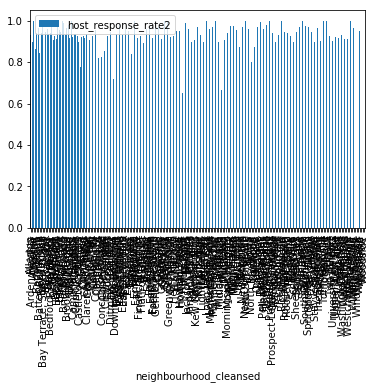

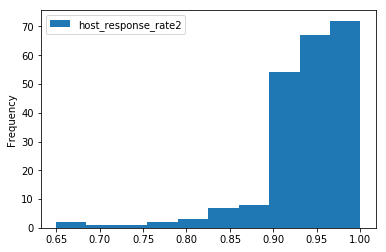

In [111]:
# aggregate host_response_rate

host["host_response_rate2"] = host['host_response_rate'].str.strip("%").astype(float)/100
a = host.groupby(["neighbourhood_cleansed"])[["host_response_rate2"]]
a.aggregate(np.mean).plot.bar()
a.aggregate(np.mean).plot.hist()
# skipna=True!!!!!!!!!!!!!!!!!!! TBD

c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


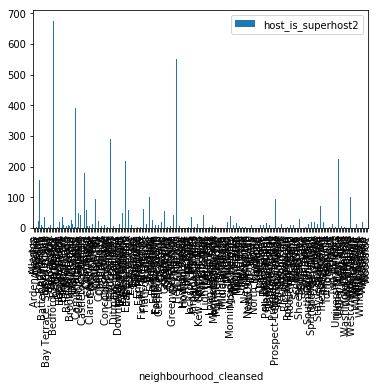

In [137]:
# aggregate host_is_superhost

host["host_is_superhost2"] = host["host_is_superhost"]
host["host_is_superhost2"] = host["host_is_superhost2"] .map({"f": 0, "t": 1})
host.groupby(["neighbourhood_cleansed"])[["host_is_superhost2"]].sum().plot.bar()
# better to normalized!!!!!!!!!!!!!!!!!TBD

c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


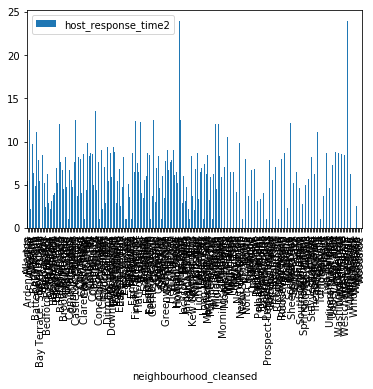

In [138]:
# aggregate host_response_time

# within an hour = 1h
# within a few hours = 12h
# within a day = 24h
# within a few days or more = 72h

host["host_response_time2"] = host["host_response_time"]
host["host_response_time2"] = host["host_response_time2"] .map({"within an hour": 1, "within a few hours": 12, "within a day": 24, "within a few days or more" : 72})
host.groupby(["neighbourhood_cleansed"])[["host_response_time2"]].aggregate(np.mean).plot.bar()

# Aggregate Transit Info:

1. How many subway entrances, bus stations within a neighbourhood
visual encoding: (1) point on map  (2) color represent how many
Bus Stops:
https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz
Subway Entrances:
https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56

2. Others
http://www.nyc.gov/html/dot/html/about/datafeeds.shtml

In [2]:
busstop = pd.read_csv("busstop.csv")
busstop.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [3]:
subway = pd.read_csv("subway.csv")
subway.head()

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5


AttributeError: 'AxesSubplot' object has no attribute 'crs'

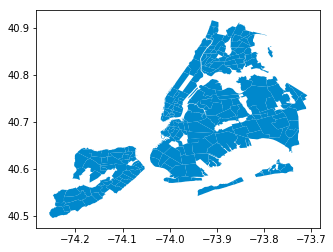

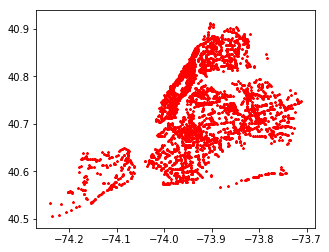

In [29]:
# plot geojson map using geopandas??????
neighbourhoods_geojson = gpd.read_file("neighbourhoods.geojson")
busstop_geojson = gpd.read_file("busstop.geojson")

neighbourhoods_geojson = neighbourhoods_geojson.plot(color = "#0088cc")
busstop_geojson.plot(marker='*', color="red", markersize=5)

busstop_geojson = busstop_geojson.to_crs(neighbourhoods_geojson.crs)

In [31]:
base = neighbourhoods_geojson.plot(color='white', edgecolor='black')
busstop_geojson.plot(ax=base, marker='o', color='red', markersize=5)

AttributeError: 'list' object has no attribute 'set_aspect'